# House price Linear Regression 


*The goal is to find the best model to predict a house’s price*

## 1 Importing Data and Libraries



In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures 

DF=pd.read_csv("kc_house_data.csv")

**DATA OVERVIEW**

In [104]:
DF.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [105]:
DF.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [106]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## 2 Data Preprocessing

In [107]:
DF.isnull().sum().sum() #verification if there is null values 

0

**No null value**

In [108]:
#delete unnecessary column
del DF['sqft_living15']
del DF['sqft_lot15']
del DF['long']
del DF['lat']
del DF['zipcode']
del DF['id']
del DF['date']

In [109]:
DF.head() 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0


In [110]:
P = DF[DF["sqft_living"] > DF["sqft_lot"]]
P.shape

(789, 14)

In [111]:
#delete Rows where value of sqft_living bigger than sqft_lot
DF.drop( DF[ DF["sqft_living"] > DF["sqft_lot"] ].index, inplace=True)


In [112]:
DF.shape

(20824, 14)

## 3 Data Vizualisation

<AxesSubplot:xlabel='grade', ylabel='price'>

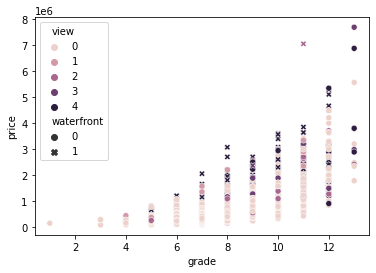

In [113]:
sns.scatterplot(data=DF, x='grade', y="price", hue='view', style="waterfront")

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

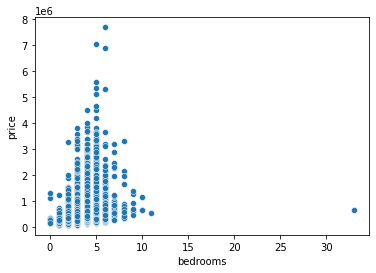

In [114]:
sns.scatterplot(
    data=DF, x="bedrooms", y="price"
)

As we can see we have an outlier so we have to remove it  

In [115]:
DF['bedrooms'].value_counts()

3     9296
4     6842
2     2556
5     1592
6      270
1      196
7       37
0       12
8       12
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [116]:
DF=DF[DF['bedrooms']!=33] #removing the outlier 

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

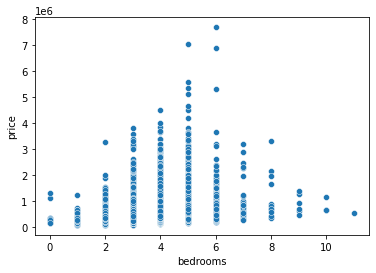

In [117]:
sns.scatterplot(
    data=DF, x="bedrooms", y="price"
)

The price is not so correlated with the number of bedrooms,because the price depends also on other features

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

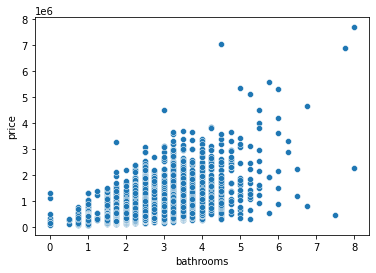

In [118]:
sns.scatterplot(
    data=DF, x="bathrooms", y="price"
)

As we can see The price is correlated with the number of bathrooms

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

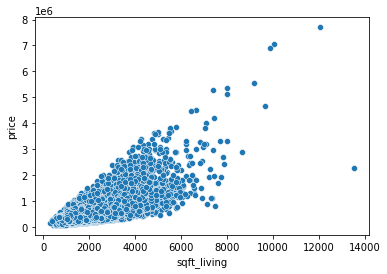

In [119]:
sns.scatterplot(
    data=DF, x="sqft_living", y="price"
)

As we can see The price of the house is strongly correlated with sqft_living but there is outliers we have to remove them

In [132]:
DF.drop( DF[ DF["sqft_living"] > 8000 ].index, inplace=True) 

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

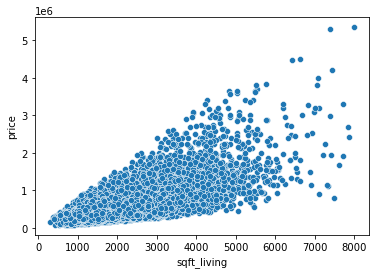

In [133]:
sns.scatterplot(
    data=DF, x="sqft_living", y="price"
)

<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

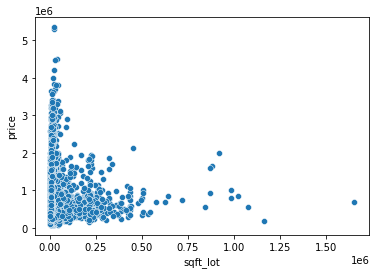

In [134]:
sns.scatterplot(
    data=DF, x="sqft_lot", y="price"
)

The price is not so correlated with sqft_lot ,so the price depends more on other features

<AxesSubplot:xlabel='grade', ylabel='price'>

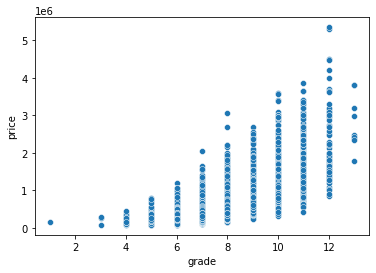

In [135]:
sns.scatterplot(
    data=DF, x="grade", y="price"
)

As we can see The price of the house is strongly correlated with grade, so the price depends on number of  grade 

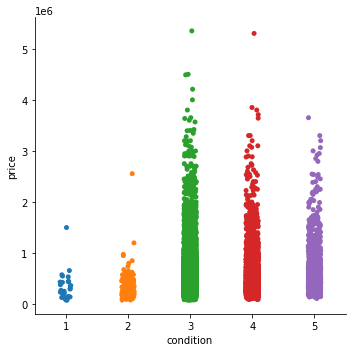

In [136]:
sns.catplot(x='condition',y='price',data=DF)

people tend to spend less if the condition of the house is bad

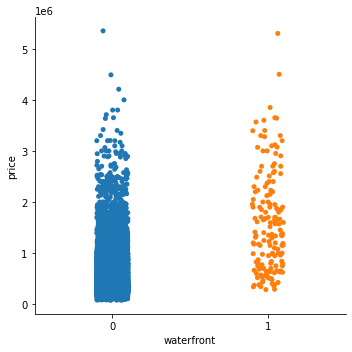

In [137]:
sns.catplot(x='waterfront',y='price',data=DF)

number of houses with no water front is larger,but there prices can go higher then those with water fronts because other features

In [138]:
DF.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.316819,0.526506,0.696265,0.088861,0.293346,0.257283,0.396049,0.035767,0.676964,0.599844,0.309237,0.066473,0.118860
bedrooms,0.316819,1.000000,0.545479,0.589286,0.023914,0.243464,-0.014126,0.074974,0.011481,0.378318,0.484332,0.305221,0.198614,0.012043
bathrooms,0.526506,0.545479,1.000000,0.772606,0.091865,0.520605,0.058526,0.185249,-0.118435,0.669278,0.699712,0.279615,0.513946,0.049261
sqft_living,0.696265,0.589286,0.772606,1.000000,0.165512,0.433250,0.091924,0.275100,-0.073629,0.778351,0.873566,0.421687,0.365624,0.043726
sqft_lot,0.088861,0.023914,0.091865,0.165512,1.000000,0.017933,0.020858,0.072238,-0.016281,0.116955,0.177016,0.009376,0.069484,0.005370
floors,0.293346,0.243464,0.520605,0.433250,0.017933,1.000000,0.029330,0.039022,-0.243886,0.480320,0.609253,-0.247254,0.458123,0.019911
waterfront,0.257283,-0.014126,0.058526,0.091924,0.020858,0.029330,1.000000,0.400666,0.017268,0.079366,0.061593,0.073617,-0.024186,0.090162
view,0.396049,0.074974,0.185249,0.275100,0.072238,0.039022,0.400666,1.000000,0.043350,0.249206,0.156348,0.272445,-0.047757,0.101102
condition,0.035767,0.011481,-0.118435,-0.073629,-0.016281,-0.243886,0.017268,0.043350,1.000000,-0.141256,-0.173504,0.172362,-0.345874,-0.064762
grade,0.676964,0.378318,0.669278,0.778351,0.116955,0.480320,0.079366,0.249206,-0.141256,1.000000,0.769253,0.161831,0.453787,0.012019


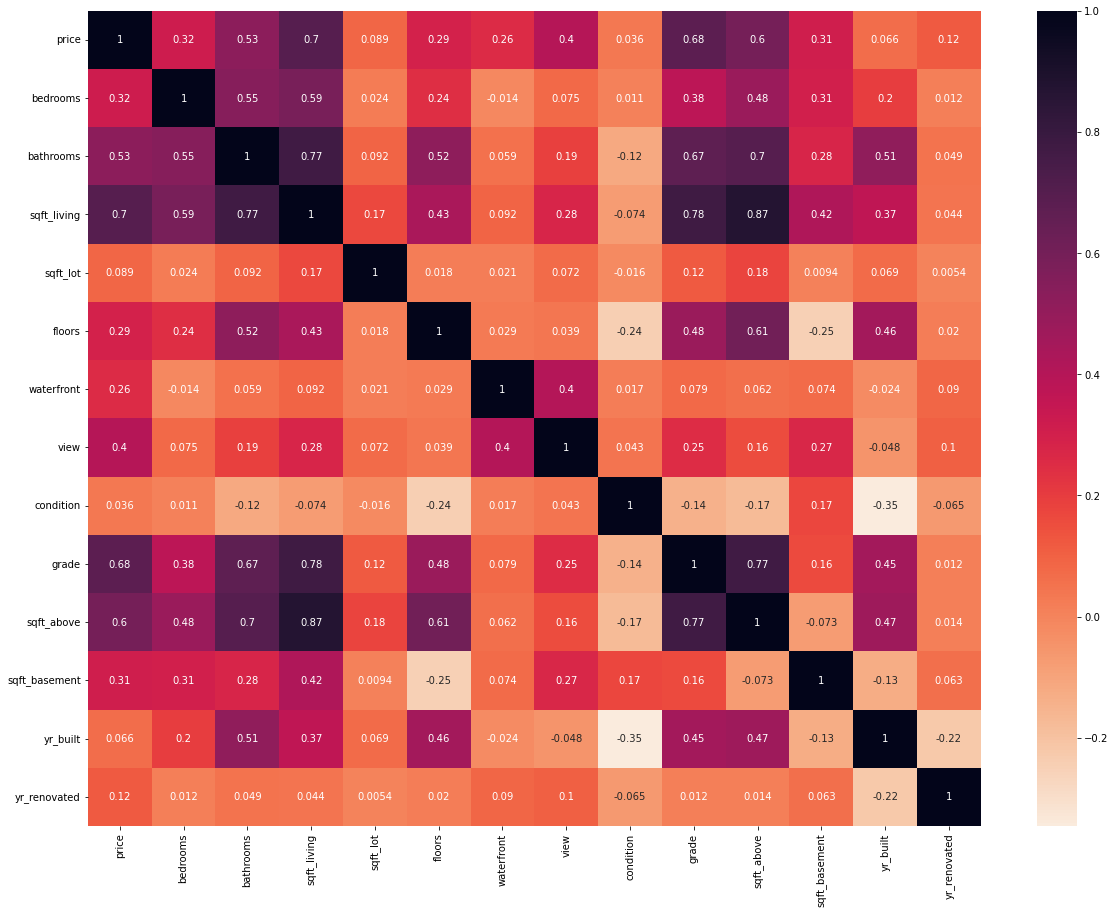

In [139]:
plt.figure(figsize=(20, 15))
correlations = DF.corr()
sns.heatmap(correlations, cmap="rocket_r", annot=True)
plt.show()

**Observation:**
   * The price depends on various features 
   
         -The most importantes features: bathrooms,sqft_living,grade,sqft_above
         
         -The less importantes features: view ,bedrooms,sqft_basement,floors ,waterfront
         
         -Features that dont have any effect on the price : y_built,y_renovated, zipcode,date,sqft_lot

## 4 Modeling

  ### linear regression :
  
     

In [140]:
#split data 
x=DF[['sqft_living']]
y=DF['price']
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.20,random_state=30)

In [141]:
model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

In [142]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 66459907725.99328
R squared 0.49211993864542103


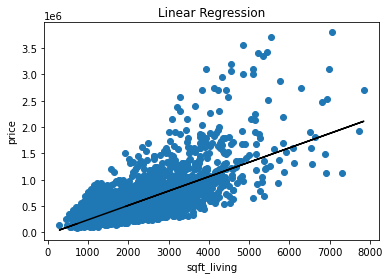

In [143]:
plt.scatter(x_test.squeeze(),y_test,label="data points")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x_test,model.predict(x_test),color="k")
plt.show()

### Multi-linear regression :

In [165]:
x=DF[['grade','sqft_living','sqft_above','bathrooms','bedrooms','floors','condition','view','waterfront']]
y=DF['price'].values
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.20,random_state=30)

In [166]:
model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

In [167]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 50242532541.0514
R squared 0.6160515206436477


by comparing the linear regression and the Multi-linear regression, we notice that the Multi-linear regression is  better,and we were able to minimize the prediction errors since the prices of houses depends on multiple features.

### Polynomial regression :
 
    Polynomial linear :

In [170]:
x=DF[['sqft_living']]
y=DF['price']

lg=LinearRegression()
poly = PolynomialFeatures(degree=3)

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.20,random_state=30)  #splitting data

x_train_fit = poly.fit_transform(x_train) #transforming our input data
x_test_ = poly.fit_transform(x_test)

lg.fit(x_train_fit, y_train) # Fitting Polynomial Regression to the dataset 

predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  62460336506.99697
R squared:  0.5226842675107376


polynomial multi regression :

In [174]:
x=DF[['grade','sqft_living','sqft_above','bathrooms','bedrooms','floors','condition','view','waterfront']]
y=DF['price'].values

lg=LinearRegression()
poly=PolynomialFeatures(degree=2)

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.20,random_state=30)  #splitting data

x_train_fit = poly.fit_transform(x_train) #transforming our input data
x_test_ = poly.fit_transform(x_test)

lg.fit(x_train_fit, y_train) # Fitting Polynomial Regression to the dataset 
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  42356588124.549614
R squared:  0.6763151302562935


by comparing the Polynomial regression with the linear and the Multi-linear regression, we notice that loss function (MSE) is smaller when using Polynomial regression and the R squared value is higher, therfore we were able to minimize the prediction errors since the prices of houses depends on multiple features and the regression is curvy and not linear so it will be batter explained with a polynomial model.